In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 98% 204M/207M [00:02<00:00, 128MB/s]
100% 207M/207M [00:02<00:00, 107MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/covid-face-mask-detection-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
batch_size = 16

train_data = ImageDataGenerator(
    rescale = 1/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

validation_data = ImageDataGenerator(rescale=1/255)
test_data = ImageDataGenerator(rescale=1/255)

train_generator = train_data.flow_from_directory(
    '/content/New Masks Dataset/Train',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_data.flow_from_directory(
    '/content/New Masks Dataset/Validation',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)
test_generator = test_data.flow_from_directory(
    '/content/New Masks Dataset/Test',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

Found 600 images belonging to 2 classes.
Found 306 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/New Masks Dataset/Train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (224, 224)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/New Masks Dataset/Validation',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (224, 224)
)

Test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/New Masks Dataset/Test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (224, 224)
)

Found 600 files belonging to 2 classes.
Found 306 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
vgg = VGG16()

553467096/553467096 [==============================] - 4s 0us/step


In [ ]:
from keras import Sequential

In [ ]:
model = Sequential()

In [ ]:
for layer in vgg.layers[:-1]:
  model.add(layer)

In [ ]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
for layer in model.layers:
  layer.trainable = False

In [ ]:
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_generator,epochs=5,validation_data=validation_generator)

<ipython-input-21-7f8b24ead526>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,epochs=5,validation_data=validation_generator)


Epoch 1/5
38/38 [==============================] - 21s 436ms/step - loss: 0.6048 - accuracy: 0.6383 - val_loss: 0.4940 - val_accuracy: 0.7745
Epoch 2/5
38/38 [==============================] - 14s 369ms/step - loss: 0.4690 - accuracy: 0.7600 - val_loss: 0.3650 - val_accuracy: 0.9052
Epoch 3/5
38/38 [==============================] - 14s 372ms/step - loss: 0.3539 - accuracy: 0.8733 - val_loss: 0.3118 - val_accuracy: 0.9150
Epoch 4/5
38/38 [==============================] - 16s 429ms/step - loss: 0.3080 - accuracy: 0.8933 - val_loss: 0.2934 - val_accuracy: 0.9150
Epoch 5/5
38/38 [==============================] - 17s 460ms/step - loss: 0.2805 - accuracy: 0.9050 - val_loss: 0.2689 - val_accuracy: 0.9085


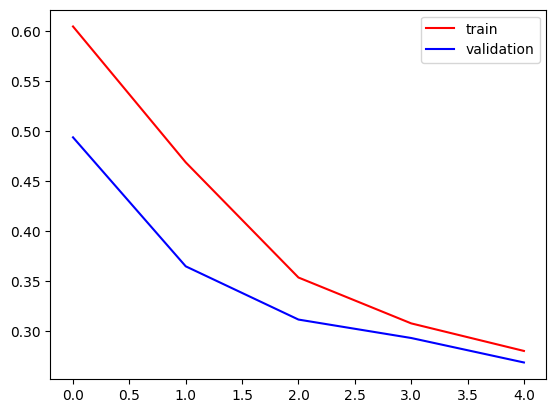

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print('Accuracy:',accuracy)

7/7 [==============================] - 5s 767ms/step - loss: 0.2708 - accuracy: 0.9100
Accuracy: 0.9100000262260437


In [ ]:
import cv2


In [ ]:
sample = cv2.imread('no_mask1.jpg')
sample = cv2.resize(sample,(224,224))

In [ ]:
def detect_face_mask(img):
    y_pred = model.predict(img.reshape(1,224,224,3))
    return round(y_pred[0][0])

In [ ]:
detect_face_mask(sample)

1/1 [==============================] - 0s 24ms/step


1

In [ ]:
print(round(0.99940646))

1


In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('model.pkl','wb'))

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
